In [87]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [92]:
def reviewsByGrade(URL):
    '''
        This function takes a URL from the section of robertchristgau.com that lists albums by their grade as input
        Then it scrapes the URL for its text before storing relevant data on grades, years, and artist/album names into 4 different dictionaries
        
    
        Input: a URL
        
        Output: nothing
        
        Modifies: 4 different dictionaries that aggregate data on grades, years, and artist/album names
    '''
    
    text = BeautifulSoup(requests.get(URL).content, "html.parser").get_text().split("\n") # get just the text from the URL
    try:
        text = text[text.index('Follow @rxgau')+5:text.index('Consumer Guide Index by Grade')]
    except:
        print(URL)

    try:
        text.remove('Compilations/Soundtracks')
    except:
        pass

    reviews = [] # get reviews for one grade

    for i in range(1, len(text)-1):
        if (text[i] != '') and (text[i+1] != ''):
            reviews.append(text[i] + " " + text[i+1]) # to get the albums
        elif (text[i-1] == '') and (text[i] != '') and (text[i+1] == ''):
            reviews.append(text[i]) # to get the compliations/soundtracks, which are only on one line

    reviews[0] = reviews[0].replace('Consumer Guide Grade List: ', '').split(' ', 1)[0] # pull the grade

    grade = reviews[0]
    reviews = reviews[1:]
    
    # convert *** to B, ** to B-, * to C+ - logic assumed from here: https://www.robertchristgau.com/xg/bk-cg90/grades-90s.php
    if grade == '***':
        grade = 'B'
    if grade == '**':
        grade = 'B-'
    if grade == '*':
        grade = 'C+'

    reviews_parsed = []
    years = []
    for review in reviews:
        try:
            reviews_parsed.append((review.split(' [')[0], # get the artist and album
                                   int(review.split(' [')[1].split(',')[0]))) # get the year and make it an integer
            
            grades_by_review[(review.split(' [')[0],
                                   int(review.split(' [')[1].split(',')[0]))] = grade
            
            if int(review.split(' [')[1].split(',')[0]) not in grades_by_year:
                grades_by_year[int(review.split(' [')[1].split(',')[0])] = [grade]
            else:
                grades_by_year[int(review.split(' [')[1].split(',')[0])].append(grade)
            
            years.append(int(review.split(' [')[1].split(',')[0]))
        except Exception as e: 
            if 'invalid literal' in str(e): # for the cases in which the album name has a '[' in it
                reviews_parsed.append(((' ['.join(review.split(' [')[:2]), 
                                        int(' ['.join(review.split(' [')[2:]).split(',')[0]))))
                                       
                grades_by_review[((' ['.join(review.split(' [')[:2]), 
                                   int(' ['.join(review.split(' [')[2:]).split(',')[0])))] = grade
                
                if int(' ['.join(review.split(' [')[2:]).split(',')[0]) not in grades_by_year:
                    grades_by_year[int(' ['.join(review.split(' [')[2:]).split(',')[0])] = [grade]
                else:
                    grades_by_year[int(' ['.join(review.split(' [')[2:]).split(',')[0])].append(grade)
                
                years.append(int(' ['.join(review.split(' [')[2:]).split(',')[0]))
            else: # deal with other errors manually
                print(e)
                print(grade)
                print(URL)
                print(review)
                print()
    
    if grade not in reviews_by_grade:
        reviews_by_grade[grade] = reviews_parsed
        years_by_grade[grade] = years
    else: # this is so we add the "star" reviews to the converted grades
        reviews_by_grade[grade] = reviews_by_grade[grade] + reviews_parsed

In [8]:
# these are the relevant URLs that we will feed into the function reviewsByGrade
URLs = ["https://www.robertchristgau.com/get_gl.php?g=A%2B", #A+
        "https://www.robertchristgau.com/get_gl.php?g=A", #A
        "https://www.robertchristgau.com/get_gl.php?g=A-", #A-
        "https://www.robertchristgau.com/get_gl.php?g=B%2B", #B+
        "https://www.robertchristgau.com/get_gl.php?g=B", #B
        "https://www.robertchristgau.com/get_gl.php?g=***", #B
        "https://www.robertchristgau.com/get_gl.php?g=B-", #B-
        "https://www.robertchristgau.com/get_gl.php?g=**", #B-
        "https://www.robertchristgau.com/get_gl.php?g=C%2B", #C+
        "https://www.robertchristgau.com/get_gl.php?g=*", #C+
        "https://www.robertchristgau.com/get_gl.php?g=C", #C
        "https://www.robertchristgau.com/get_gl.php?g=C-", #C-
        "https://www.robertchristgau.com/get_gl.php?g=D%2B", #D+
        "https://www.robertchristgau.com/get_gl.php?g=D", #D
        "https://www.robertchristgau.com/get_gl.php?g=D-", #D-
        "https://www.robertchristgau.com/get_gl.php?g=E%2B", #E+
        "https://www.robertchristgau.com/get_gl.php?g=E", #E
        "https://www.robertchristgau.com/get_gl.php?g=E-"] #E-

In [9]:
# create four separate dictionarys
# we might not end up using all of them, but since we only have to call this once, it's worth the extra computation time just in case we want different representations of the data

global reviews_by_grade
reviews_by_grade = {}

global years_by_grade
years_by_grade = {}

global grades_by_year
grades_by_year = {}

global grades_by_review
grades_by_review = {}

for URL in URLs: # this loop is doing all the work
    reviewsByGrade(URL)

list index out of range
B+
https://www.robertchristgau.com/get_gl.php?g=B%2B
Tim Heidecker: Too Dumb for Suicide: Tim Heidecker's Trump



In [13]:
'''
    Since we only have one error, we resolve it manually
'''

reviews_by_grade["B+"] = reviews_by_grade["B+"] + [("Tim Heidecker: Too Dumb for Suicide: Tim Heidecker's Trump Songs", 2017)]
grades_by_review[("Tim Heidecker: Too Dumb for Suicide: Tim Heidecker's Trump Songs", 2017)] = "B+"
grades_by_year[2017].append("B+")
years_by_grade["B+"].append(2017)

In [43]:
'''
for now, we only want grades_by_year in order to test our hypothesis
taking a peek at its keys, we notice an incorrect entry - 136 is not a valid year
after a manual check at the website, it looks like the year was wrong on the site itself (it was not an issue with our code)
we drop the value
'''

display(sorted(list(grades_by_year.keys()))[0:5])
display(sorted(list(grades_by_year.keys()))[-5:])

del grades_by_year[136]
display(sorted(list(grades_by_year.keys()))[0:5])

[1960, 1962, 1964, 1967, 1968]

[2017, 2018, 2019, 2020, 2021]

KeyError: 136

In [53]:
# make a data frame for easier viewing
years_df = pd.DataFrame.from_dict(grades_by_year, orient='index').transpose().reindex(sorted(years_df.columns), axis=1)

In [60]:
grades = {"A+":97,
          "A":93,
          "A-":90,
          "B+":87,
          "B":83,
          "B-":80,
          "C+":77,
          "C":73,
          "C-":70,
          "D+":67,
          "D":63,
          "D-":60,
          "E+":57,
          "E":53,
          "E-":50}

In [64]:
# quantify the grades for analysis
years_df_numerical = years_df.replace(grades)

In [81]:
# we notice that some years have very few reviews
# let's drop the years that have fewer than 30 reviews
years_df_numerical = years_df_numerical[years_df_numerical.columns[years_df_numerical.isnull().mean() < 0.8]]

In [82]:
means = pd.DataFrame(years_df_numerical.mean()).reset_index().rename(columns={'index': 'year',0: 'mean'})

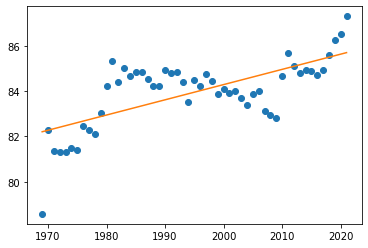

In [91]:
# let's visualize the mean distribution of scores across years

#create basic scatterplot
plt.plot(means['year'], means['mean'], 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(means['year'], means['mean'], 1)

#add linear regression line to scatterplot 
plt.plot(means['year'], m*means['year']+b)

plt.show()

We definitely see an upward trend, but not a steady one

In [93]:
means

,year,mean
0,1969,78.584906
1,1970,82.271429
2,1971,81.379061
3,1972,81.307910
4,1973,81.317460
5,1974,81.509202
6,1975,81.389068
7,1976,82.481250
8,1977,82.292063
9,1978,82.116022
